# Pandas Intermediate to Advance

## What's covered?
1. Combining Data From Multiple Tables using pd.merge() Function
	- `how` argument
	- Learning with Two Example DataFrame
	- Applying Inner Join
	- Applying Left Join
	- Applying Right Join
	- Applying Outer Join
	- Applying Cross Join
	- Brief primer on merge methods (relational algebra)
2. Solving a Case Study by Joining Multiple Tables
	- Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv
	- Joining Purchase Table with Customer and Product Table
	- Generating Basic Reports on the Data
3. Visual Data Analysis using Pandas (Plotting)
	- Reading .csv File - Iris Data
	- Histogram Plot
	- KDE Plot
	- Box Plot
	- Vertical and Horizontal Bar Plot
	- Scatter Plot

## Combining Data From Multiple Tables using `pd.merge()` Function

`pandas` has full-featured, **high performance in-memory join operations** idiomatically very similar to relational databases like SQL. 

`pandas` provides a single function, **merge()**, as the entry point for all standard database join operations between DataFrame or named Series objects:

<img style="float: right;" width="400" height="400" src="images/00_merge_tables.PNG">

**Question: How to combine data from multiple tables?**  
**Answer:** Multiple tables can be concatenated both column wise and row wise as database-like join/merge operations are provided to combine multiple tables of data.


**Remember**  
> 1. Multiple tables can be concatenated both column-wise and row-wise using the `concat` function.
> 2. For database-like merging/joining of tables, use the `merge` function.

<img src="images/01_merge_operation.PNG"> 

**Syntax**  
<code>pd.merge(left, right, how='inner', on=None)</code>

In [2]:
import pandas as pd
import numpy as np

In [3]:
left = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [4]:
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [5]:
result = pd.merge(left, right, on="key")

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


### `how` argument

<img style="float: right;" width="400" height="400" src="images/02_joining_dataframes.PNG">

The `how` argument to `merge` specifies how to determine which keys are to be included in the resulting table. If a key combination **does not appear** in either the left or right tables, the values in the joined table will be `NA`. Here is a summary of the `how` options and their SQL equivalent names:

| Merge method `(how)` | SQL Join Name | Description | Important Pointer |
|:----|:----|:----|:----|
| `inner` | `INNER JOIN` | Use intersection of keys from both frames | Display matching records from both tables |
| `left` | `LEFT OUTER JOIN` | Use keys from left frame only | Display all records from the left table and matching records from the right table |
| `right` | `RIGHT OUTER JOIN` | Use keys from right frame only | Display all records from the right table and matching records from the left table | 
| `outer` | `FULL OUTER JOIN` | Use union of keys from both frames |  Keep all the records from both tables |
| `cross` | `CROSS JOIN` | Create the cartesian product of rows of both frames | Cartesian Product |




### Learning with Two Example DataFrame
Let's consider the two dataframes given below and apply all merge operations:
<img src="images/03_example_dataframes.PNG">


In [6]:
left = pd.DataFrame({"key1": ["K0", "K0", "K1", "K2"], 
                     "key2": ["K0", "K1", "K0", "K1"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [7]:
right = pd.DataFrame({"key1": ["K0", "K1", "K1", "K2"], 
                      "key2": ["K0", "K0", "K0", "K0"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


### Applying Inner Join

**Use intersection of keys from both frames**
<img src="images/04_inner_join.PNG">

In [8]:
result = pd.merge(left, right, on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [12]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


### Applying Left Join

**Use keys from left frame only**

<img src="images/05_left_join.PNG">

In [9]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Applying Right Join

**Use keys from right frame only**

<img src="images/06_right_join.PNG">

In [10]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


### Applying Outer Join

**Use union of keys from both frames**

<img src="images/07_outer_join.PNG">

In [11]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


### Applying Cross Join

**Create the cartesian product of rows of both frames**

<img src="images/08_cross_join.PNG">

In [13]:
result = pd.merge(left, right, how="cross")

result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### Brief primer on merge methods (relational algebra)

Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). There are several cases to consider which are very important to understand:
> 1. **one-to-one joins:** for example when joining two DataFrame objects on their indexes (which must contain unique values).
> 2. **many-to-one joins:** for example when joining an index (unique) to one or more columns in a different DataFrame.
> 3. **many-to-many joins:** joining columns on columns.

It is worth spending some time understanding the result of the **many-to-many** join case. In SQL / standard relational algebra, if a key combination appears more than once in both tables, the resulting table will have the **Cartesian product** of the associated data.

## Solving a Case Study with merge()

### Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv

In [3]:
cust_df = pd.read_csv('data/customer_data.csv')

prod_df = pd.read_csv('data/product_data.csv')

pur_df = pd.read_csv('data/purchase_data.csv')

In [4]:
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


In [5]:
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [6]:
prod_df.head()

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


### Joining Purchase Table, Customer and Product Table

In [7]:
df = pd.merge(pur_df, cust_df, how='inner', on='cust_id')
df.head()

,cust_id,prod_id,cust_name
0,cust_12345,p_001,Sally
1,cust_12346,p_003,Jenna
2,cust_12347,p_002,Eliana
3,cust_12348,p_004,Cristen
4,cust_12349,p_001,Steve


In [8]:
df = pd.merge(df, prod_df, how='inner', on='prod_id')
df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning


### Generating Basic Reports on the Data

In [ ]:
# # Try it yourself

In [9]:
df.prod_name.value_counts()

Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: prod_name, dtype: int64

In [10]:
grouped_df = df.groupby('prod_name')

grouped_df

In [11]:
grouped_df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning
9,cust_12346,p_003,Jenna,Full Stack Development
10,cust_12353,p_003,Pansy,Full Stack Development
11,cust_12359,p_003,Latrisha,Full Stack Development
12,cust_12363,p_003,Shela,Full Stack Development
13,cust_12370,p_003,Angla,Full Stack Development


In [12]:
grouped_df.first()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12348,p_004,Cristen
Data Structures,cust_12347,p_002,Eliana
Full Stack Development,cust_12346,p_003,Jenna
Machine Learning,cust_12345,p_001,Sally


In [13]:
grouped_df.groups.keys()

dict_keys(['Competitive Programming', 'Data Structures', 'Full Stack Development', 'Machine Learning'])

In [14]:
grouped_df.get_group('Machine Learning')

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning
5,cust_12357,p_001,Normand,Machine Learning
6,cust_12358,p_001,Nam,Machine Learning
7,cust_12367,p_001,Taunya,Machine Learning
8,cust_12369,p_001,Dung,Machine Learning


In [15]:
grouped_df.describe()

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

## Visual Data Analysis using Pandas (Plotting)

**Syntax**   
<code>DataFrame.plot(kind = "kind")</code>

The kind of plot to produce:
1. `line` : line plot (default)
2. `bar` : vertical bar plot
3. `barh` : horizontal bar plot
4. `hist` : histogram
5. `box` : boxplot
6. `kde` : Kernel Density Estimation plot
7. `density` : same as ‘kde’
8. `area` : area plot
9. `pie` : pie plot
10. `scatter` : scatter plot
11. `hexbin` : hexbin plot

### Reading .csv File - Iris Data

In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Histogram Plot

<AxesSubplot:ylabel='Frequency'>

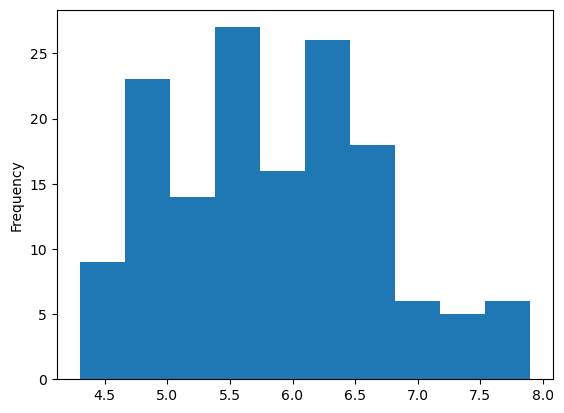

In [18]:
df['SepalLengthCm'].plot(kind = 'hist')

### KDE Plot

<AxesSubplot:ylabel='Density'>

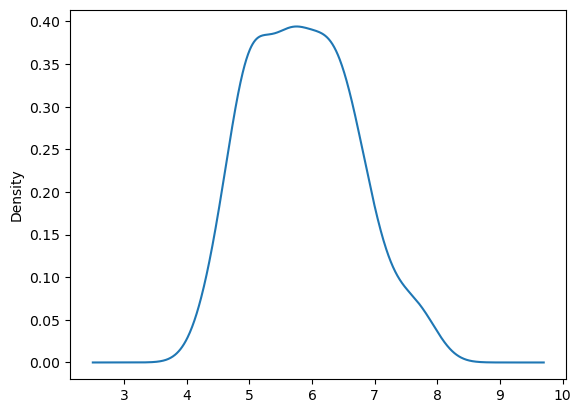

In [19]:
df['SepalLengthCm'].plot(kind = 'kde')

### Box Plot

<AxesSubplot:>

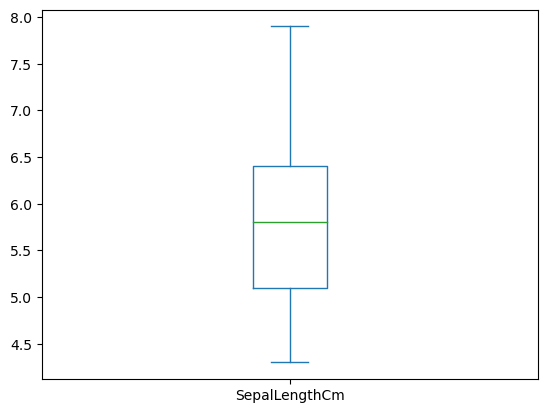

In [20]:
df['SepalLengthCm'].plot(kind = 'box')

### Vertical and Horizontal Bar Plot

<AxesSubplot:>

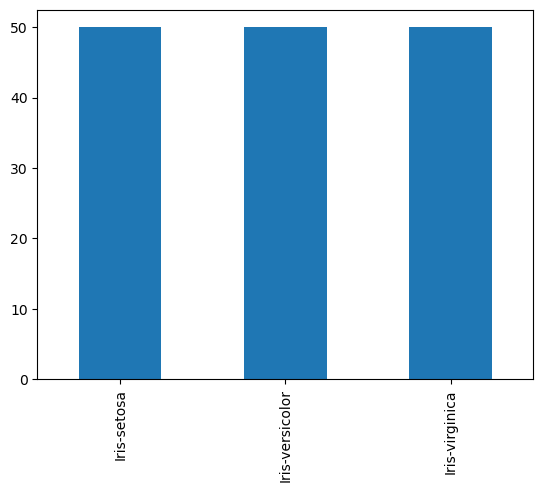

In [22]:
df['Species'].value_counts().plot(kind='bar')

<AxesSubplot:>

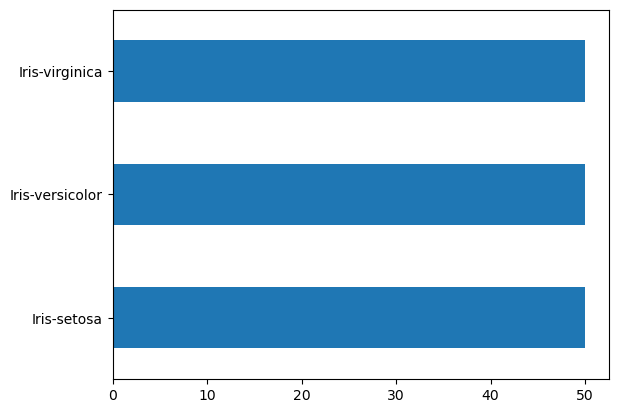

In [23]:
df['Species'].value_counts().plot(kind='barh')

### Scatter Plot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

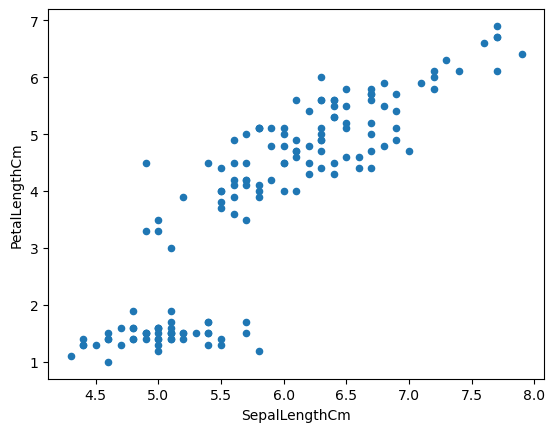

In [36]:
df.plot(x = "SepalLengthCm", y = "PetalLengthCm", kind = 'scatter')

# Missing Values - COMING SOON
# Outlier Treatment - COMING SOON
# Reshaping Layout of Table - COMING SOON

## Missing Values

http://analytics-magazine.org/missing-values/

<b>Major takeaway:</b>
1. Missing values in the data create uncertainty for the analyst and the information consumer because decisions need to be made without having the full picture.
2. Missing values can also reduce the number of usable records for the analysis, or force analysts to eliminate variables from the analysis.
3. Consequently, if an observation has a missing value in any of the required variables, the whole observation (data record) needs to be omitted from the analysis.
4. Other options would be to exclude it from the analysis variable as a whole or to insert imputation values for the missing data points.


## Reshaping Layout of Tables

<img src="images/02_long_wide_format.PNG" />

<img style="float: right;" width="400" height="400" src="images/03_pivot.PNG">

**Question: How to reshape the layout of tables?**  
**Answer:** Change the structure of your data table in multiple ways. You can `melt()` your data table from `wide to long/tidy form` or `pivot()` from `long to wide format`. With aggregations built-in, a pivot table is created with a single command.

Data is often stored in so-called `stacked` or `record` format. In a `record` or `wide` format, typically there is one row for each subject. In the `stacked` or `long` format there are multiple rows for each subject where applicable.

<img src="images/04_melt.PNG" />